In [1]:
import inspect

# Algorithmes d'apprentissage

Au coeur de tous les algorithmes d'apprentissage présenté ici, il y a la matrice $Q_{s,a}$, qui est l'estimation relative (à l'algorithme) de chaque couple état-action. Plus la valeur du couple $(etat, action)$ est haute, plus elle est associé à un taux de réussite élevé, et pour un état donné (une ligne de la $Q_{s,a}$ ), la politique optimale associé choisira l'action ayant la valeur la plus haute.

On va ici distinguer deux familles d'algorithmes:
- d'une part la famille des algorithmes de Monte-Carlo, qui fonctionne dans un contexte épisodique, et qui a besoin d'un épisode complet mettre à jour la politique,
- d'autre part la famille des algorithme de Temporal Difference (TD), qui mette à jour al politique à chaque étape de l'épisode

## Methode(s) Monte-carlo

La méthode de **Monte-Carlo** (pour le *Reinforcement Learning*) est l'approche la plus "naïve" qu'on puisse avoir: pour évaluer la qualité d'un état, respectivement d'un couple état-action, on observe le "taux de réussite" de cet état, respectivement du couple état-action, après un épisode complet. 
 A l'issue de suffisement d'épisodes, on a une estimation relative de chaque état, ou couple état-action, à partir de laquelle on peut déduire une politique "optimale".

lien pertinent: https://towardsdatascience.com/monte-carlo-learning-b83f75233f92

**Remarques**:
- Comment faire lorsqu'on ne peut pas partir de chacun des états du système (comme c'est le cas dans *Frozen-Lake*)?
- D'une certaine manière, on "se fiche" de comment l'agent parcours les états, seul l'observation des trajectoires comptent
- Instinctivement, pour éviter de biaiser le parcours de l'agent, on peut utiliser une politique uniformément aléatoire (lors de la phase d'apprentissage)
- Avec le constat précédent, on peut simplement paramétrer un algoritme de Monte Carlo avec comme seul paramètre le nombre d'itération

In [2]:
with open("Monte_Carlo.py", 'r', encoding='utf-8') as the_file:
    print(the_file.read())

from src.V2.Classes.Policy import Policy
from src.V2.Classes.Agent import Agent

import numpy as np
import random

# Generic Initialisation
def MC(environment, epoch_number = 8000):
    # Get the observation space & the action space
    environment_space_length: int = environment.observation_space.n # type: ignore
    action_space_length: int = environment.action_space.n # type: ignore
    Q_sa = np.zeros((environment_space_length, action_space_length))
    incremental_counter = np.zeros((environment_space_length, action_space_length))
    random_policy = Policy(
        lambda agent, state: 
            random.randint(0, action_space_length - 1)
        ,
        environment_space_length,
        action_space_length
    )
    def update_MC(agent: Agent):
        # All the (state, action) pair got updated with the last reward of the run
        final_value = agent.trajectory.steps[-1].reward
        for step in agent.trajectory.steps:
            increment = incremental_counter[step.st

## Temporal Difference (TD)

Contrairement aux algoritmes "Monte Carlo", les algorithmes TD mettent à jour leur politique à chaque étape de chaque épisode.

**Remarques:**
- J'ai trouvé beaucoup de contradiction dans les définitions de *on-policy* et *off-policy*, celles que j'ai utilisée sont la version de wikipedia (et découle de l'observation des méthodes de mise à jour)
- pour ces algorithmes, on aura typiquement 4 paramètres: **le nombre d'itération**, **le facteur d'apprentissage** $\alpha$, **le facteur d'actualisation** $\gamma$ et $\epsilon$ **le facteur d'exploration** de la politique $\epsilon$*-greedy*

### SARSA

L'algorithme **SARSA** tire son nom de sa méthode d'apprentissage, qui signifie *State-Action-Reward-State-Action*: à chaque pas de l'algorithme, c'est à dire à chaque fois qu'un agent choisi une action, on va mettre à jour la matrice $Q_{s, a}$ en fonction de l'était de départ, l'action choisi par la politique, la récompense fournit par l'environnement, mais également l'action suivante à l'état suivant choisi par la politique en cours. L'amélioration de $Q_{s, a}$ peut donc s'écrire comme la fonction suivante: $update\_SARSA(State_n, Action_n, Reward_n, State_{n+1}, Action_{n+1})$.

Puisque que la fonction d'amélioration dépend de l'action $Action_{n+1}$, elle même déterminée par la politique en cours, on dit qu'il s'agit d'un algorithme *on-policy*.

In [3]:
with open("SARSA.py", 'r', encoding='utf-8') as the_file:
    print(the_file.read())

from typing import Callable
import gymnasium as gym
from nptyping import Float, NDArray, Shape
import numpy as np

from src.V2.Classes.Policy import Policy
from src.V2.Classes.Agent import Agent
from src.V2.Functions.epsilon_greedy_policy_factory import make_epsilon_greedy_policy

def SARSA(environment, epsilon = 0.1, alpha = 0.1, gamma = 0.99, epoch_number = 8000):
    # Get the observation space & the action space
    environment_space_length: int = environment.observation_space.n # type: ignore
    action_space_length: int = environment.action_space.n # type: ignore
    Q_sa = np.zeros((environment_space_length, action_space_length))

    epsilon_greedy_policy = Policy(
        make_epsilon_greedy_policy(epsilon = epsilon, Q_sa = Q_sa),
        environment_space_length,
        action_space_length
    )
    def update_SARSA(agent: Agent, state_index: int, action_index: int, next_state: int, next_action: int,  reward:float = 0.0):
        # Q[s, a] := Q[s, a] + α[r + γQ(s', a') - Q(s

### Q-learning

L'algorithme **Q_learning** ressemble beaucoup à l'algorithme **SARSA**: comme lui il va mettre à jour la matrice $Q_{s, a}$. L'amélioration de $Q_{s, a}$ peut s'écrire comme la fonction suivante: $update\_Qlearning(State_n, Action_n, Reward_n, State_{n+1})$.

Contrairement à la fonction d'almélioration de **SARSA**, on voit que celle de **Q_learning** ne dépend pas de l'action $Action_{n+1}$: elle ne dépend donc pas de la politique utilisé, et on parlera alors d'un algorithme *off-policy*.

In [4]:
with open("Q_learning.py", 'r', encoding='utf-8') as the_file:
    print(the_file.read())

import gymnasium as gym
import numpy as np

from src.V2.Classes.Policy import Policy
from src.V2.Classes.Agent import Agent
from src.V2.Functions.epsilon_greedy_policy_factory import make_epsilon_greedy_policy

def Q_learning(environment, epsilon = 0.1, alpha = 0.1, gamma = 0.99, epoch_number = 8000):
    # Get the observation space & the action space
    environment_space_length: int = environment.observation_space.n # type: ignore
    action_space_length: int = environment.action_space.n # type: ignore
    Q_sa = np.zeros((environment_space_length, action_space_length))

    epsilon_greedy_policy = Policy(
        make_epsilon_greedy_policy(epsilon = epsilon, Q_sa = Q_sa),
        environment_space_length,
        action_space_length
    )
    def update_Qlearning(agent: Agent, state_index, action_index, next_state, reward: float = 0):
        # Q[s, a] := Q[s, a] + α[r + γ . argmax_a {Q(s', a')} - Q(s, a)]
        best_next_action = np.argmax(Q_sa[next_state, ])
        Q_sa[state_i

# Comparaisons, convergence et métrique

Les temps de calcul des algorithmes seront générallement "long", on voudrait alors savoir quand s'arrêter avec un résultat (*i.e* une politique optimale estimée) qui converge. Avant de se lancer dans une longue période d'apprentissage, on aimerait choisir judicieusement les paramètres de notre algorithme.

**Remarques:**
- La lecture de littérature sur le sujet peut donner une bonne idée de paramètres "non-déconnants", ou d'une plage de valeur pertinente
- Ici, j'aurai une approche naïve, et je choisirais ces paramètres uniquement via l'exploitation des algorithmes précédents

## Grille

Pour essayer de me faire une idée du comportement de chaque algorithme en fonction de ses paramètre, l'approche "naïve" est de faire une grille sur l'espace des paramètres. Les valeurs possibles pour $\alpha$, $\gamma$ et $\epsilon$ sont toutes dans l'intervalle $[0, 1]$, et les valeurs pour le nombre d'estimation sont les entiers positifs.

La graine aléatoire est réinitialisée avant chaque apprentissage, et chaque évaluation de test.

Voici la version pour *Q-learning* et *SARSA*:

In [5]:
with open("parameter_grid.py", 'r', encoding='utf-8') as the_file:
    print(the_file.read())

import random
import gymnasium as gym
import numpy as np
import json

from SARSA import SARSA
from Q_learning import Q_learning

from src.V2.Classes.Policy import Policy
from src.V2.Classes.Agent import Agent
from src.V2.Functions.run import run_static

#    ____             _                     _____             __ _                       _   _             
#   |  _ \           | |                   / ____|           / _(_)                     | | (_)            
#   | |_) | __ _  ___| | ___   _ _ __     | |     ___  _ __ | |_ _  __ _ _   _ _ __ __ _| |_ _  ___  _ __  
#   |  _ < / _` |/ __| |/ / | | | '_ \    | |    / _ \| '_ \|  _| |/ _` | | | | '__/ _` | __| |/ _ \| '_ \ 
#   | |_) | (_| | (__|   <| |_| | |_) |   | |___| (_) | | | | | | | (_| | |_| | | | (_| | |_| | (_) | | | |
#   |____/ \__,_|\___|_|\_\\__,_| .__/     \_____\___/|_| |_|_| |_|\__, |\__,_|_|  \__,_|\__|_|\___/|_| |_|
#                               | |                                 __/ |                         

Une version simplifié de la grille pour la méthode de Monte Carlo:

In [6]:
with open("parameter_grid_mc.py", 'r', encoding='utf-8') as the_file:
    print(the_file.read())

import random
import gymnasium as gym
from nptyping import Float, NDArray, Shape
import numpy as np
import json

from Monte_Carlo import MC

from src.V2.Classes.Policy import Policy
from src.V2.Classes.Agent import Agent
from src.V2.Functions.run import run_static

#    ____             _                     _____             __ _                       _   _             
#   |  _ \           | |                   / ____|           / _(_)                     | | (_)            
#   | |_) | __ _  ___| | ___   _ _ __     | |     ___  _ __ | |_ _  __ _ _   _ _ __ __ _| |_ _  ___  _ __  
#   |  _ < / _` |/ __| |/ / | | | '_ \    | |    / _ \| '_ \|  _| |/ _` | | | | '__/ _` | __| |/ _ \| '_ \ 
#   | |_) | (_| | (__|   <| |_| | |_) |   | |___| (_) | | | | | | | (_| | |_| | | | (_| | |_| | (_) | | | |
#   |____/ \__,_|\___|_|\_\\__,_| .__/     \_____\___/|_| |_|_| |_|\__, |\__,_|_|  \__,_|\__|_|\___/|_| |_|
#                               | |                                 __/ |             

Le format est donc le suivant:
```yaml
{

        "algorithm": "SARSA" | "Q_learning" | "mc",
        "success": number, # [0, 1]
        "epoch_number": int,
        "epsilon": 0.5, # si "SARSA" | "Q_learning"
        "alpha": 0.1,   # si "SARSA" | "Q_learning"
        "gamma": 0.8,   # si "SARSA" | "Q_learning"
        "q_sa":[[..][...]...]
        }
```

**Remarque:** Effectuer les calculs pour toute la grille prend du temps => on sauvegarde à chaque nouveau modèle les résultats dans un fichier.

## Analyse

On cherche à avoir une réflexion et une justification de l'algorithme choisi pour notre problème, ainsi que du jeux de paramètre optimal.

En considérant que le fichier contenant le résultat de la grille obtenu lors de l'étape précédente s'appelle `data/fat_grid_2.json`

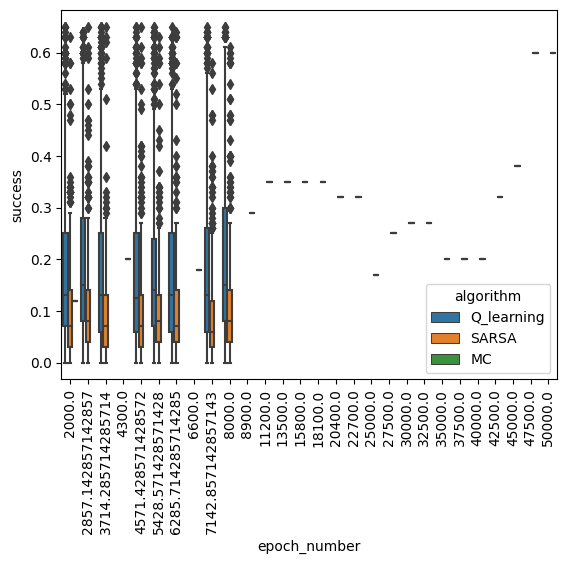

In [9]:
import json
from typing import Dict
import numpy as np
import seaborn
import pandas as pd
import matplotlib.pyplot as plt

from src.V2.Functions.reshape import reshape_one, reshape_order
from src.V2.Functions.kendall_distance import kendall_matrix_distance


output_files = ["data/mc_grid_final.json", "data/fat_grid_2.json"]

results = []

for filename in output_files:
    with open(filename, 'r') as the_file:
        results += json.loads(the_file.read())


# Tri des résultats
results.sort(reverse=True, key = lambda element: element["success"])


# Ajout de "signature de matrice" pour mieux comparer les Q_sa, et ainsi étudier la convergeance
for result in results:
    result["reshape_one"] = reshape_one(np.asarray(result["q_sa"]))
    result["reshape_order"] = reshape_order(np.asarray(result["q_sa"]))


### Approche univarié

Dans un premier temps, on peut s'intéresser à l'impact d'un paramètre. Puisque je n'ai pas de répétition au sein de la grille (compte tenu du temps de calcul), la variabilité, respectivement non variabilité, pour les méthodes Q-learning et SARSA, respectivement la méthode Monte Carlo, s'explique par les autres paramètres testés, respectivement le manque de paramètres testés.

Lors de cette approche, il convient donc de faire attention aux conclusions hâtives, car il est possible (et probable) que chaque paramètre n'a pas le même impact sur le résultat de l'algorithme, et que les paramètres aient des effets croisés.

On utilisera deux jeux de données tout au long de l'analyse suivante: 
 - d'une part les données complètes
 - d'autre part un sous ensemble comprenant uniquement les meilleurs résultats (un taux de succès lors du test > 0.5) et sans Monte Carlo

In [29]:
big_df = pd.DataFrame(results)

# Avec un peu de filtre
sub_results = list(filter(
    lambda element: 
        element["success"] > 0.5 and element["algorithm"] != "MC",
        results
))

better_df = pd.DataFrame(sub_results)
Q_learning_ratio = len(better_df[better_df["algorithm"] == "Q_learning"]) / len(better_df)
print("Parmi les solutions ayant plus de 0.5 de succès, la proportion de méthode Q-learning est de " + str(Q_learning_ratio) + "\n contre " + str(1 - Q_learning_ratio) + " pour SARSA")

Parmie les solution ayant plus de 0.5 de succès, la poportion de méthode Q-learning est de 0.8969957081545065
 contre 0.10300429184549353 pour SARSA


#### Durée d'apprentissage / nombre d'itération

Le nombre d'itération est évidemment un paramètre important, on s'attend à ce que l'algorithme s'amélioçre jusqu'à la, ou une, convergence.

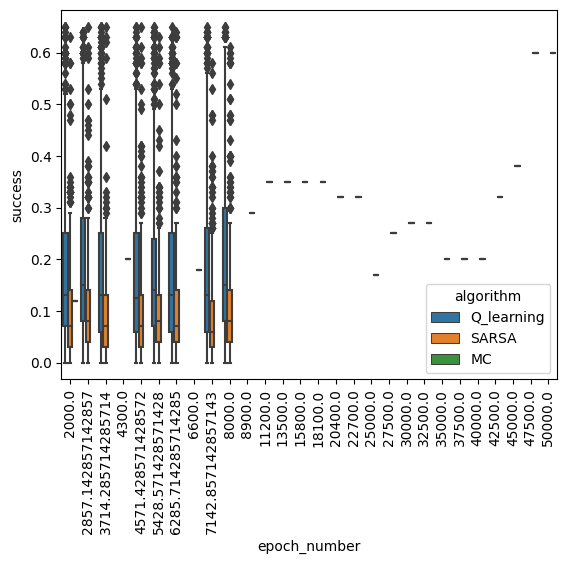

In [15]:

plot = seaborn.boxplot(data=big_df, x="epoch_number", y="success", hue="algorithm")
plot.tick_params(axis='x', rotation=90)


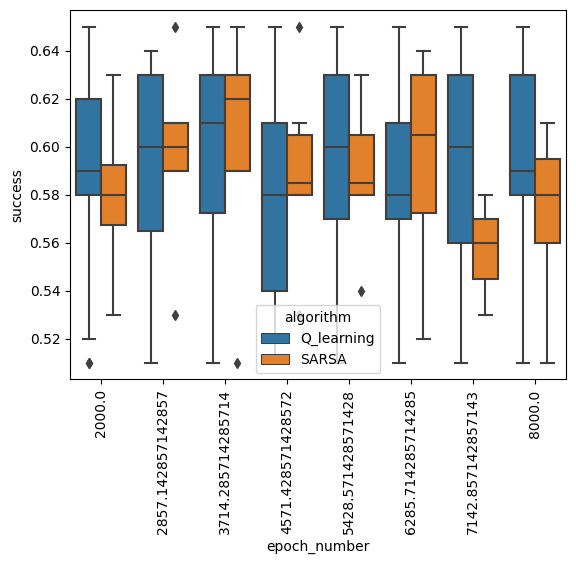

In [16]:

seaborn.boxplot(data=better_df, x="epoch_number", y="success", hue="algorithm").tick_params(axis='x', rotation=90)

Il ne parait pas si évident sur ce graphique de l'impact de la période d'apprentissage sur le résultat de l'algorithme, sauf pour Monte Carlo. 
Toutefois, on peut se dire que l'impact des autre paramètre doit être plus important, et qu'il nous empêche de voir cela. On voit aussi que *Q-learning* est tout le temps supérieur à *SARSA*, tout paramètres confondus.

**Remarque 1:** il parait normal que Monte Carlo converge plus "lentement", car contrarement aux deux autres méthodes, sa politique d'exploration n'est jamais mise à jour durant l'apprentissage => un algorithme moins naïf mettrait à jour sa politique d'apprentissage durant l'apprentissage, pour mieux explorer.

**Remarque 2:** Sur le deuxième graphique, 

#### Facteur d'exploration $\epsilon$

Le facteur d'exploration détermine, lors de la phase d'apprentissage, à quel point notre agent d'exploration va choisir une action au hasard. Si $\epsilon = 1$, il choisira tout le temps au hasard.

**Remarque:** Je présente ici les algorithmes Q-learning et SARSA dans leur version la plus simple, avec un $\epsilon$ fixé. Il est commun d'utilisé un taux de décroissement de ce même $\epsilon$, appelé $\epsilon$-*decay*, qui gouverne lors de chaque épisode comment $\epsilon $ est modifié, avec un taux entre 0 et 1. L'analyse dans ce cas devrait porté sur ce paramètre.

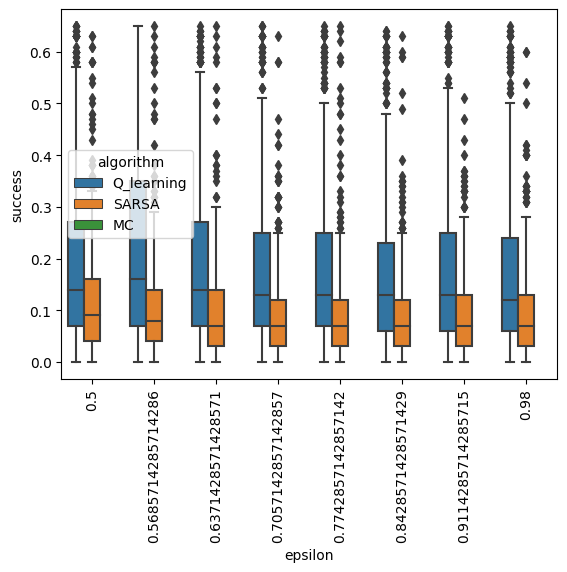

In [11]:
seaborn.boxplot(big_df, x = "epsilon", y= "success", hue='algorithm').tick_params(axis='x', rotation=90)

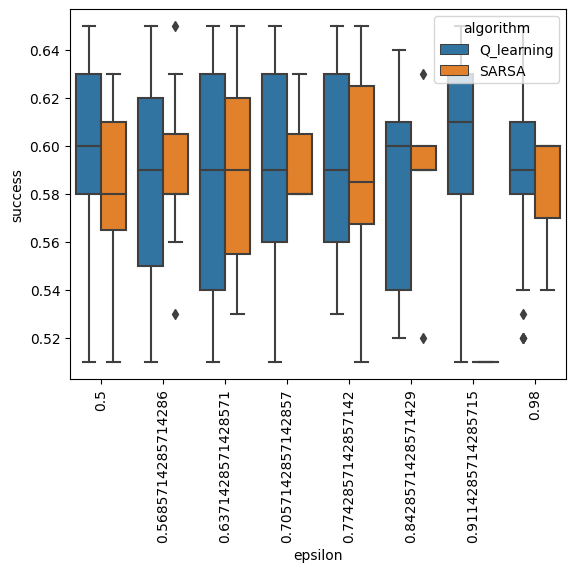

In [17]:
seaborn.boxplot(better_df, x = "epsilon", y= "success", hue='algorithm').tick_params(axis='x', rotation=90)

On aurait plutot tendance à choisir un $\epsion$ entre 0.5 et 0.6. On observe également que le *Q-learning* est systématiquement au desssus de *SARSA*.

#### Facteur d'apprentissage $\alpha$

Le facteur d'apprentissage à quel point l'apprentissage est "têtue", c'est à dire à quel point une nouvelle estimation d'un couple *état-action* va mettre à jour l'ancienne valeur.

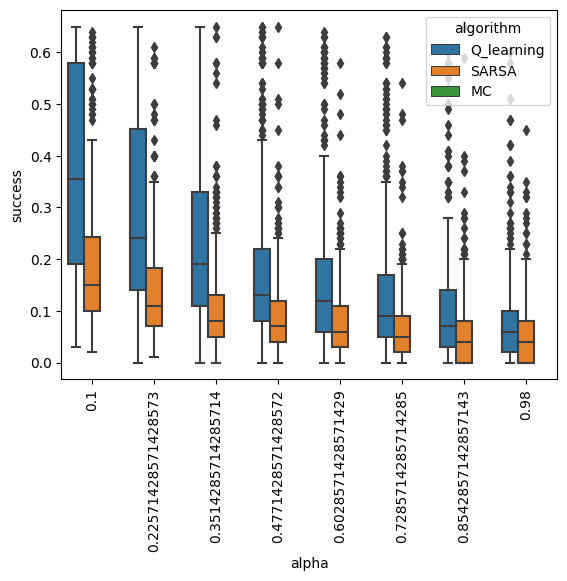

In [12]:
seaborn.boxplot(big_df, x = "alpha", y= "success", hue='algorithm').tick_params(axis='x', rotation=90)

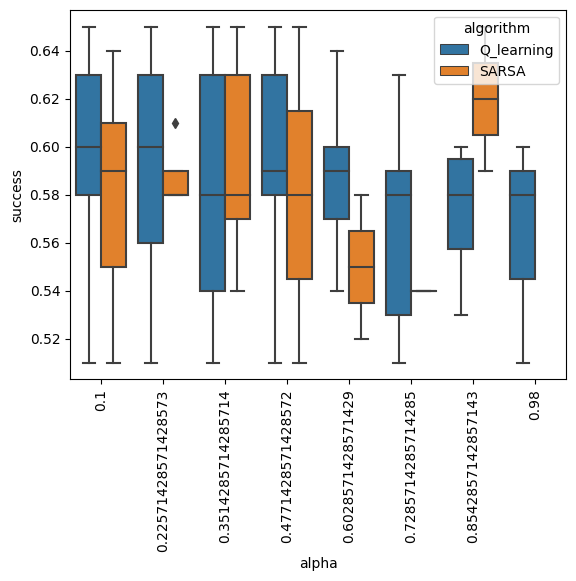

In [30]:
seaborn.boxplot(better_df, x = "alpha", y= "success", hue='algorithm').tick_params(axis='x', rotation=90)